# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

ID        Date Element  Data_Value
58367  USC00205563  2015-12-31    TMAX           6
4752   USC00208972  2015-12-31    TMIN         -22
40650  USC00200228  2015-12-31    TMAX           0
32236  USC00207312  2015-12-31    TMIN         -17
36836  USW00014833  2015-12-31    TMIN         -21
10573  USC00205050  2015-12-31    TMIN         -17
10639  USC00205050  2015-12-31    TMAX           0
25717  USC00201502  2015-12-31    TMIN         -22
25720  USC00201502  2015-12-31    TMAX          -6
32919  USC00207308  2015-12-31    TMIN         -33
10175  USC00201250  2015-12-31    TMAX          11
36842  USW00014833  2015-12-31    TMAX         -10
29410  USC00200230  2015-12-31    TMIN         -17
45666  USC00200032  2015-12-31    TMIN         -33
39455  USC00202308  2015-12-31    TMAX           6
32922  USC00207308  2015-12-31    TMAX           6
45691  USC00200032  2015-12-31    TMAX          11
39461  USC00202308  2015-12-31    TMIN         -11
29445  USC00200230  2015-12-31    TMAX           0
61135  USW00094889  2015-12-31    TMIN         -21
4080   USC00208972  2015-12-31    TMAX          -6
32235  USC00207312  2015-12-31    TMAX           6
20555  USC00205451  2015-12-31    TMIN         -17
40653  USC00200228  2015-12-31    TMIN         -11
21100  USC00205822  2015-12-31    TMAX          11
10253  USC00201250  2015-12-31    TMIN          -6
58490  USC00205563  2015-12-31    TMIN         -11
21088  USC00208202  2015-12-31    TMAX           0
21087  USC00208202  2015-12-31    TMIN         -56
21078  USC00205822  2015-12-31    TMIN           0
...            ...         ...     ...         ...
17155  USC00207320  2005-01-01    TMIN         -11
19772  USC00205450  2005-01-01    TMAX         128
19769  USC00205450  2005-01-01    TMIN         -33
49030  USC00207312  2005-01-01    TMAX         150
39569  USC00200842  2005-01-01    TMAX         144
10073  USW00014833  2005-01-01    TMAX          33
1860   USC00202308  2005-01-01    TMAX         150
39565  USC00200842  2005-01-01    TMIN         -22
35771  USC00200230  2005-01-01    TMAX         122
35785  USC00200230  2005-01-01    TMIN         -39
60995  USW00004848  2005-01-01    TMIN           0
55102  USC00200032  2005-01-01    TMAX          67
2073   USC00203712  2005-01-01    TMAX         144
18066  USW00014853  2005-01-01    TMIN         -39
3058   USC00205822  2005-01-01    TMAX         128
49823  USC00200228  2005-01-01    TMAX         150
32274  USC00208202  2005-01-01    TMIN         -50
2035   USC00202308  2005-01-01    TMIN         -17
49074  USC00207312  2005-01-01    TMIN         -39
18049  USW00014853  2005-01-01    TMAX          56
2812   USC00203712  2005-01-01    TMIN         -50
32266  USC00208202  2005-01-01    TMAX         150
31718  USC00205451  2005-01-01    TMIN         -44
31715  USC00205451  2005-01-01    TMAX         156
35479  USC00201502  2005-01-01    TMIN         -39
10079  USW00014833  2005-01-01    TMIN         -44
39454  USC00205563  2005-01-01    TMAX          28
49827  USC00200228  2005-01-01    TMIN         -39
39468  USC00205563  2005-01-01    TMIN         -28
17153  USC00207320  2005-01-01    TMAX         150

[165085 rows x 4 columns]

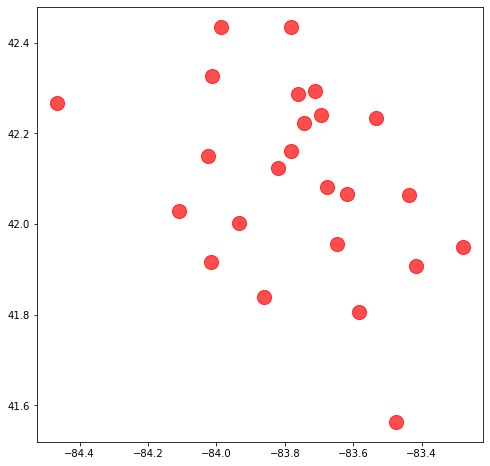

In [12]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

# data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    
    df2 = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
#     not positive that the df2, which is coming from a different data source, is ONLY the necessary data as it ish ould be limited by the ID which is the weather station ID
    df2 = df2.sort_values(by='Date', ascending=False)
    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

#     return mplleaflet.display()
    return  df2
leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')